<a href="https://colab.research.google.com/github/daniabib/object-detection-plg/blob/main/Region_Proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selectivesearch
!pip install torch_snippets

In [ ]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

In [ ]:
!wget https://www.argospetinsurance.co.uk/assets/uploads/2016/03/Obese-cat-1.jpg

--2022-04-10 14:59:57--  https://www.argospetinsurance.co.uk/assets/uploads/2016/03/Obese-cat-1.jpg
Resolving www.argospetinsurance.co.uk (www.argospetinsurance.co.uk)... 13.95.211.4
Connecting to www.argospetinsurance.co.uk (www.argospetinsurance.co.uk)|13.95.211.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58882 (58K) [image/jpeg]
Saving to: ‘Obese-cat-1.jpg’

Obese-cat-1.jpg     100%[===================>]  57.50K  --.-KB/s    in 0.01s   

2022-04-10 14:59:57 (4.98 MB/s) - ‘Obese-cat-1.jpg’ saved [58882/58882]



In [ ]:
image = read("Obese-cat-1.jpg", mode=1)

In [ ]:
segments_fz = felzenszwalb(image, scale=200)

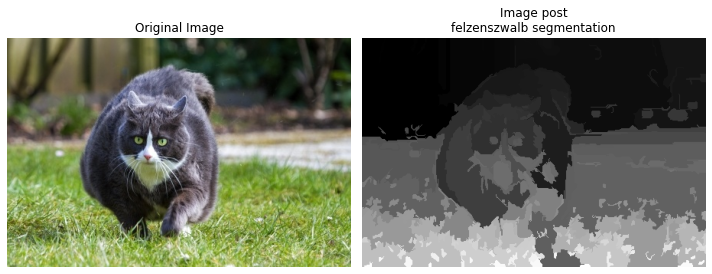

In [ ]:
subplots([image, segments_fz],
         titles=['Original Image',\
                 'Image post\nfelzenszwalb segmentation'],
         sz=10, nc=2)

In [ ]:
def extract_candidates(image):
  """Use selectivesearch to fetch region proposals from the input image."""

  image_label, regions = selectivesearch.selective_search(image,
                                                          scale=200, min_size=100)
  image_area = np.prod(image.shape[:2])
  candidates = []

  for r in regions:
    if r["rect"] in candidates: continue
    if r["size"] < (0.05 * image_area): continue
    if r["rect"] in candidates: continue
    x, y, w, h = r["rect"]
    candidates.append(list(r["rect"]))
    
  return candidates

In [ ]:
candidates = extract_candidates(image)

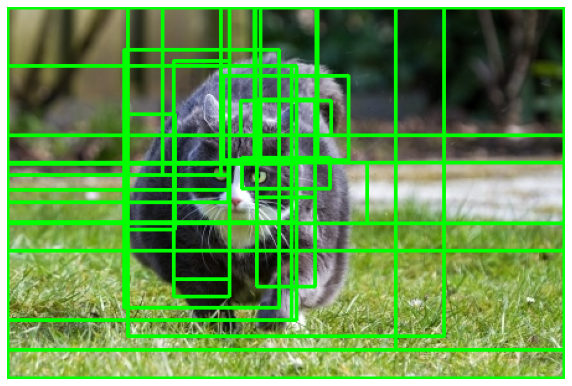

In [ ]:
show(image, bbs=candidates)

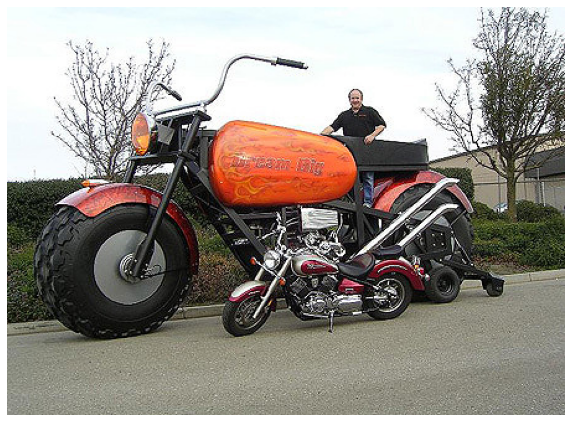

In [ ]:
image = read("homemadebike_1.jpg", mode=1)
show(image)

In [ ]:
candidates = extract_candidates(image)

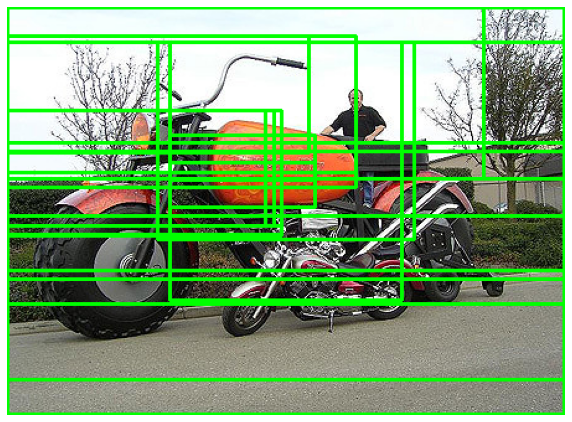

In [ ]:
show(image, bbs=candidates)

## Intersection over union

In [ ]:
def intersection_over_union(box_1, box_2, epsilon=1e-5):
    x1 = max(box_1[0], box_2[0])
    y1 = max(box_1[1], box_2[1])
    x2 = min(box_1[2], box_2[2])
    y2 = min(box_1[3], box_2[3])
    width = (x2 - x1)
    height = (y2 - y1)

    if (width<0) or (height <0):
        return 0.0

    area_overlap = width * height
    area_a = (box_1[2] - box_1[0]) * (box_1[3] - box_1[1])
    area_b = (box_2[2] - box_2[0]) * (box_2[3] - box_2[1])
    area_combined = area_a + area_b - area_overlap

    return area_overlap / (area_combined + epsilon)